# CS5830 - Group15 - Project 6

## Baseflow Dataset Analysis + Linear Regression

#### Dataset

- `Date` – number of days since 01/01/0000
- `Segment id` – an identifier of the segment of river; it can be treated as a categorical variable
- `x/y` – the spatial location of the gaging station at which observations are obtained
- `Evapotranspiration` – the evapotranspiration amount of an area adjacent to the river segment in the given month
- `Precipitation` - the precipitation amount of an area adjacent to the river segment in the given month
- `Irrigation pumping` - the amount of groundwater pumped out for irrigation in an area adjacent to the river segment in the given month
- `Observed` – observed baseflow \[target\]

#### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### Data Preparation

In [2]:
# df = pd.read_csv("RRCA_baseflow.csv")

# df['Date'] = df['Date'] - 693963    # Fix Date Column

# df.info()

In [3]:
import pandas as pd

# load the dataset into a pandas dataframe
df = pd.read_csv("RRCA.csv")

# convert the "Date" column to date dtype
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# check the dtypes of the dataframe
print(df.dtypes)
df=df.dropna()
display(df.isnull().sum())
df.head()


Date                  datetime64[ns]
Segment_id                     int64
x                              int64
y                              int64
Evapotranspiration           float64
Precipitation                float64
Irrigation_pumping           float64
Observed                     float64
Year                           int64
dtype: object


Date                  0
Segment_id            0
x                     0
y                     0
Evapotranspiration    0
Precipitation         0
Irrigation_pumping    0
Observed              0
Year                  0
dtype: int64

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Year
0,1945-11-28,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945
1,1945-12-29,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945
2,1946-01-26,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946
3,1946-02-26,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946
4,1946-03-28,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946


### Analysis

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Year
0,1945-11-28,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945
1,1945-12-29,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945
2,1946-01-26,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946
3,1946-02-26,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946
4,1946-03-28,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946
...,...,...,...,...,...,...,...,...,...
15586,1976-03-28,98,721870,14387040,0.00,0.00,0.0,0.298500,1976
15587,1976-04-28,98,721870,14387040,0.00,0.00,0.0,0.211475,1976
15588,1976-05-28,98,721870,14387040,0.00,0.00,0.0,0.122951,1976
15589,1976-06-28,98,721870,14387040,0.00,0.00,0.0,0.120000,1976


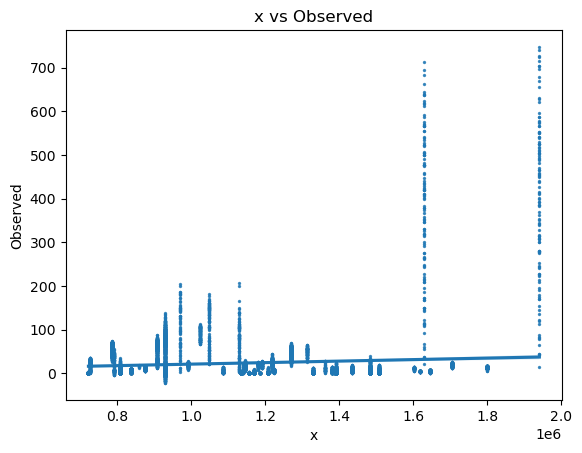

x
Pearson Test: PearsonRResult(statistic=0.08961601998066822, pvalue=3.5817866020810347e-29)
Average: 1169435.2568789686
Standard Deviation: 292499.1341238749


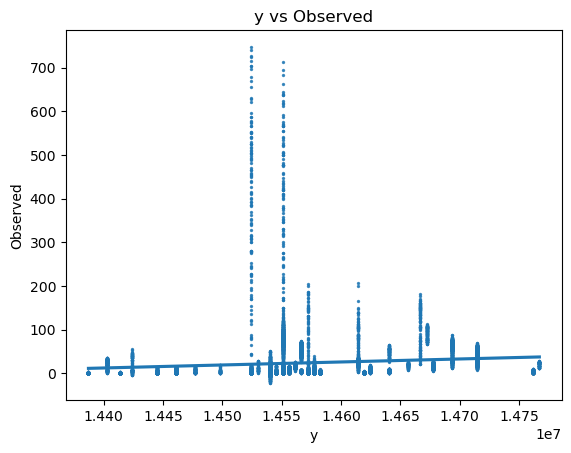

y
Pearson Test: PearsonRResult(statistic=0.10175116338670216, pvalue=3.6781856907517453e-37)
Average: 14570660.457956513
Standard Deviation: 83310.47939781596


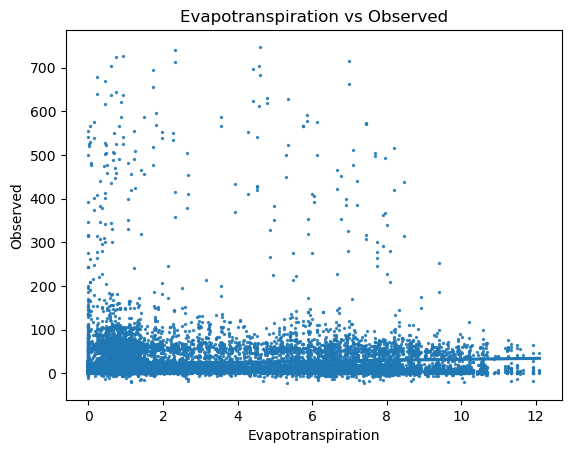

Evapotranspiration
Pearson Test: PearsonRResult(statistic=0.062247828151395006, pvalue=7.285232063544412e-15)
Average: 2.6874908601116143
Standard Deviation: 3.1672348613974446


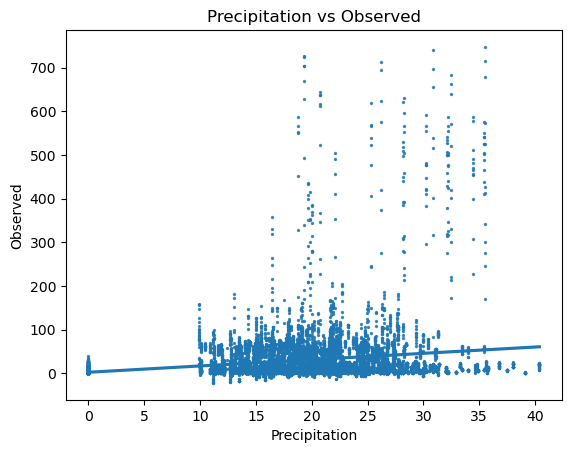

Precipitation
Pearson Test: PearsonRResult(statistic=0.2700333234609299, pvalue=1.1917385125264653e-258)
Average: 14.915468539541804
Standard Deviation: 10.512908513378601


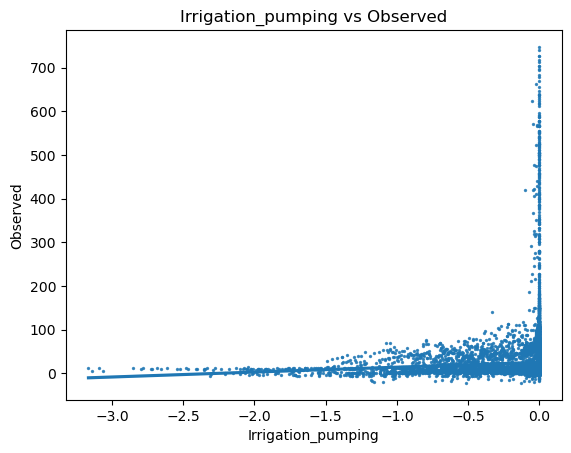

Irrigation_pumping
Pearson Test: PearsonRResult(statistic=0.054756772426893544, pvalue=7.824228676366114e-12)
Average: -0.09071256513373054
Standard Deviation: 0.27372592842301


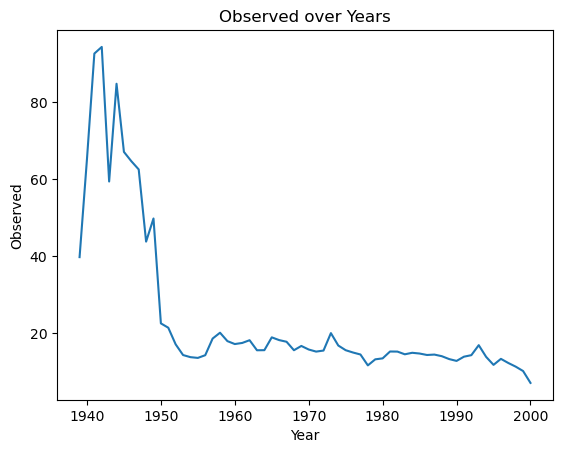

In [4]:
target = 'Observed'

X = df.drop(columns=[])
y = df[target]
display(X)

for col in ['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']:
    data = df[col]
    plt.figure(col)
    ax = sns.regplot(x=data, y=y, scatter_kws={'s':2})
    ax.set_title(f'{col} vs Observed')
    ax.set_ylabel("Observed")
    ax.set_xlabel(col)
    # plt.savefig(f'figures/{col}-plot.pdf')
    plt.show()
    print(col)
    print(f'Pearson Test: {stats.pearsonr(data, y)}')
    print(f'Average: {data.mean()}')
    print(f'Standard Deviation: {stats.tstd(data)}')

# TODO: Look At Data Over Time
# 
# Resample the DataFrame to a yearly frequency
df_yearly = df.resample('Y', on='Date').mean()

# Plot the 'Observed' column over years
plt.figure()
ax = sns.lineplot(data=df_yearly, x=df_yearly.index.year, y='Observed')
ax.set_title('Observed over Years')
ax.set_ylabel('Observed')
ax.set_xlabel('Year')
plt.show()


### Linear Regression

In [5]:
req = df[['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping','Observed']].copy()
req.head()

,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,1086190,14476800,0.59,18.99,0.0,0.145161
1,1086190,14476800,0.97,29.63,0.0,0.445161
2,1086190,14476800,1.34,29.63,0.0,1.332203
3,1086190,14476800,1.79,29.63,0.0,2.932203
4,1086190,14476800,8.23,29.63,0.0,3.728689


In [6]:
train, test = train_test_split(req, test_size=0.2, random_state=123)

# Define the training and testing data
X_train = train.drop(columns=[target], axis=1)
y_train = train[target]

X_test = test.drop(columns=[target], axis=1)
y_test = test[target]

# Train a linear regression model on the original data
model = LinearRegression()
model.fit(X_train, y_train)

print("Original:", model.score(X_test, y_test))

# Train a linear regression model on the scaled data
numerical_data = ['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

ct = make_column_transformer(
    (StandardScaler(), numerical_data),
)

pipe = make_pipeline(
    ct,
    LinearRegression()
)

pipe.fit(X_train, y_train)

print("Scaled:", pipe.score(X_test, y_test))

Original: 0.08944985039591702
Scaled: 0.08944985039591702
